In [1]:
pip install pandas matplotlib psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

In [3]:
# Connect to you PostgreSQL database
conn=psycopg2.connect(
    dbname="supermarket_sales_db",
    user="postgres",
    password="Ganesh@28",
    host="localhost",
    port="5432"
)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5900\649798780.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)


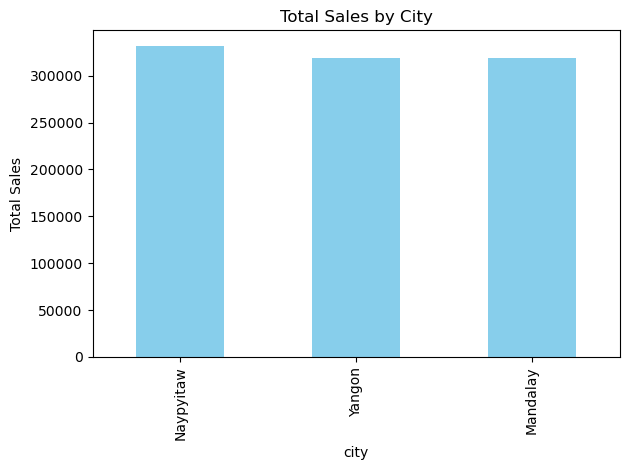

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5900\649798780.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


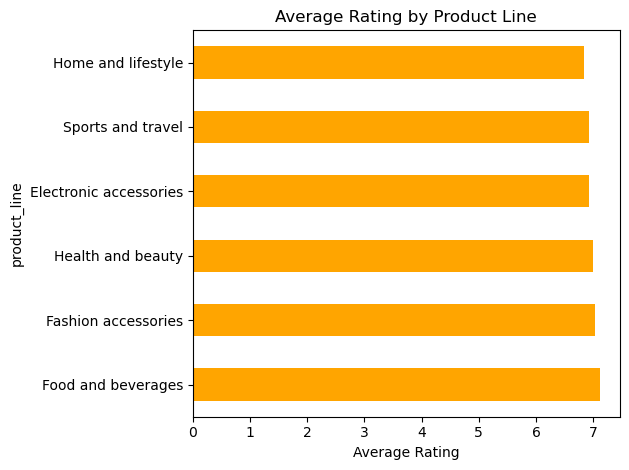

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5900\649798780.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


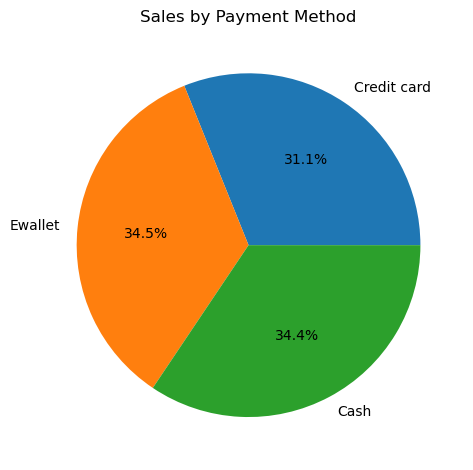

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5900\649798780.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, conn)


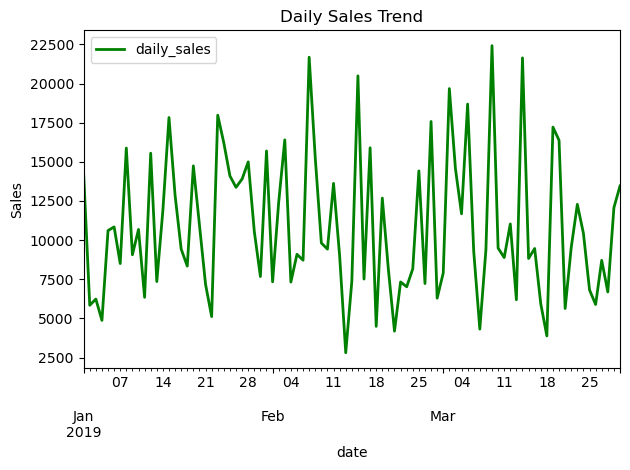

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5900\649798780.py:60: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query5, conn)


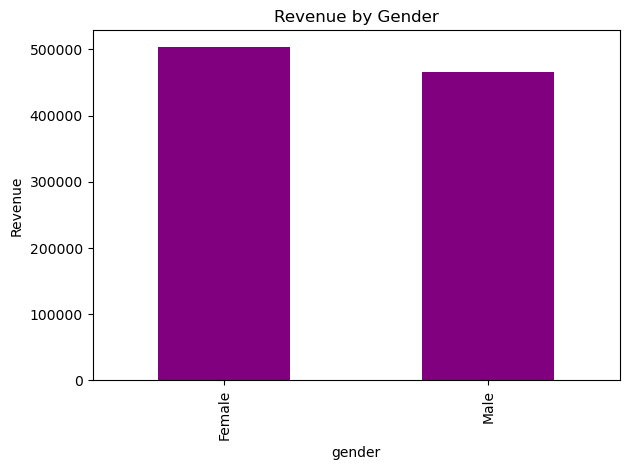

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5900\649798780.py:73: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(query6, conn)


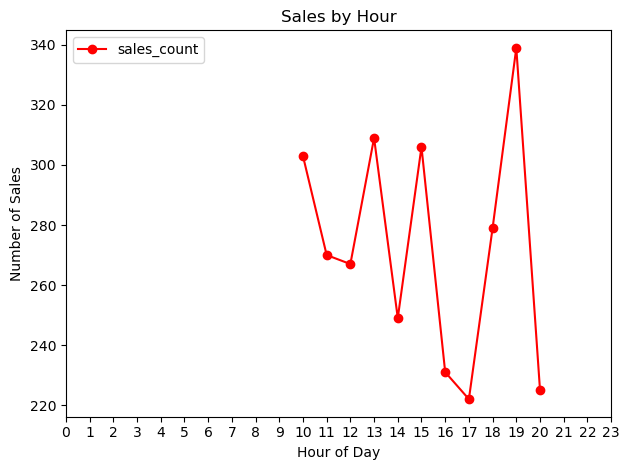

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5900\649798780.py:89: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7 = pd.read_sql(query7, conn)


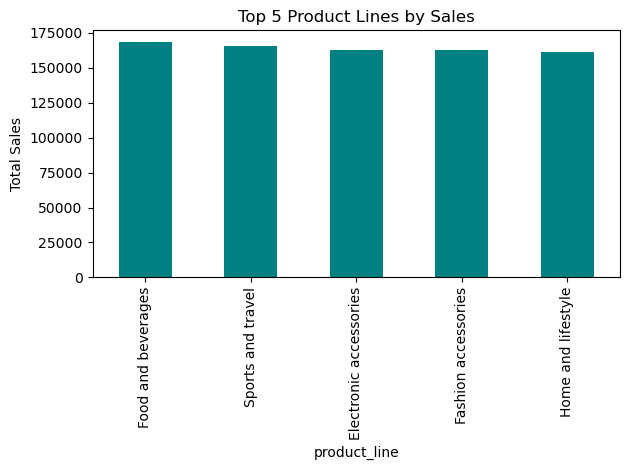

In [5]:

# 1. Total Sales by City
query1 = """
SELECT city, SUM(total) AS total_sales
FROM sales
GROUP BY city
ORDER BY total_sales DESC;
"""
df1 = pd.read_sql(query1, conn)
df1.plot(kind='bar', x='city', y='total_sales', title='Total Sales by City', legend=False, color='skyblue')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 2. Average Rating by Product Line
query2 = """
SELECT product_line, ROUND(AVG(rating), 2) AS avg_rating
FROM sales
GROUP BY product_line
ORDER BY avg_rating DESC;
"""
df2 = pd.read_sql(query2, conn)
df2.plot(kind='barh', x='product_line', y='avg_rating', title='Average Rating by Product Line', legend=False, color='orange')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

# 3. Sales by Payment Method
query3 = """
SELECT payment, COUNT(*) AS total_transactions
FROM sales
GROUP BY payment;
"""
df3 = pd.read_sql(query3, conn)
df3.set_index('payment').plot.pie(y='total_transactions', autopct='%1.1f%%', title='Sales by Payment Method', legend=False)
plt.ylabel('')
plt.tight_layout()
plt.show()

# 4. Daily Sales Trend
query4 = """
SELECT date, SUM(total) AS daily_sales
FROM sales
GROUP BY date
ORDER BY date;
"""
df4 = pd.read_sql(query4, conn)
df4['date'] = pd.to_datetime(df4['date'])
df4.set_index('date', inplace=True)
df4.plot(title='Daily Sales Trend', linewidth=2, color='green')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# 5. Revenue by Gender
query5 = """
SELECT gender, SUM(total) AS revenue
FROM sales
GROUP BY gender;
"""
df5 = pd.read_sql(query5, conn)
df5.plot(kind='bar', x='gender', y='revenue', title='Revenue by Gender', legend=False, color='purple')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# 6. Hourly Sales Activity
query6 = """
SELECT EXTRACT(HOUR FROM time::time) AS hour, COUNT(*) AS sales_count
FROM sales
GROUP BY hour
ORDER BY hour;
"""
df6 = pd.read_sql(query6, conn)
df6.plot(kind='line', x='hour', y='sales_count', title='Sales by Hour', marker='o', color='red')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# 7. Top Product Line by Sales
query7 = """
SELECT product_line, SUM(total) AS total_sales
FROM sales
GROUP BY product_line
ORDER BY total_sales DESC
LIMIT 5;
"""
df7 = pd.read_sql(query7, conn)
df7.plot(kind='bar', x='product_line', y='total_sales', title='Top 5 Product Lines by Sales', legend=False, color='teal')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# Close the connection
conn.close()